In [2]:
# Cell 1 - Setup and Imports
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fix working directory if running from Scripts folder
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

if os.path.basename(current_dir) == 'Scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'Scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# Import your modules
try:
    from Scripts.preprocessing import ReviewPreprocessor
    # note the folder
    from Scripts.scraper import main as run_scraper
    print("Modules imported successfully!")
except ImportError as e:
    print("Import failed, trying fallback...")
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

Current working directory: c:\Users\ruths\Desktop\10AcademyWeek0\web-scrapping-challenge-week2
Modules imported successfully!


In [3]:
# Cell 2 - Run Scraper (Get Fresh Data)
print("Starting Scraper...")
raw_df = run_scraper()

if raw_df is not None and not raw_df.empty:
    print(f"\nScraping successful! Collected {len(raw_df)} reviews")
else:
    print("No data collected. Check your internet or app IDs.")

Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.3195715
Total Ratings: 38868
Total Reviews: 8337

BOA: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.1726847
Total Ratings: 6366
Total Reviews: 1219

Dashen: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.168704
Total Ratings: 3915
Total Reviews: 772

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:03<00:07,  3.81s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [00:07<00:03,  3.73s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:11<00:00,  3.77s/it]


Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Bank of Abyssinia: 400
  Dashen Bank: 400

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: CBE ይለያል።...
Date: 2025-11-29 17:22:32

Rating: ⭐⭐⭐⭐⭐
Review: it's special for me...
Date: 2025-11-29 15:54:14

Rating: ⭐⭐
Review: Make it user friendly....
Date: 2025-11-29 08:17:45

Bank of Abyssinia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: 🙏👍...
Date: 2025-11-29 03:47:54

Rating: ⭐⭐⭐⭐⭐
Review: Very Good...
Date: 2025-11-28 20:18:20

Rating: ⭐⭐⭐⭐⭐
Review: goof...
Date: 2025-11-28 13:33:37

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: very smart App easy to use and friendly...
Date: 2025-11-29 16:22:04

Rating: ⭐⭐⭐⭐⭐
Review: Very exemplery App to other Bank Aps !...
Date: 2025-

In [4]:
# Cell 3 - Run Preprocessing
print("\nStarting Preprocessing...")

preprocessor = ReviewPreprocessor()
success = preprocessor.process()

if success:
    df = preprocessor.df
    print(f"\nPreprocessing completed! Final dataset has {len(df)} reviews")
else:
    print("Preprocessing failed!")
    df = None


Starting Preprocessing...
STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_id: 277 (23.08%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-10-03 to 2025-11-29

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1200 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1200

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Bank of Abyssinia: 400
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400

Rating distribution:
  ⭐⭐⭐⭐⭐: 735 (61.3%)
  ⭐⭐⭐⭐: 89 (7.4%)
  ⭐⭐⭐: 67 (5.6%)
  ⭐⭐: 46 (3.8%)
  ⭐: 263 (21.9%)

Date range: 2024-10-0

Generating visualizations...


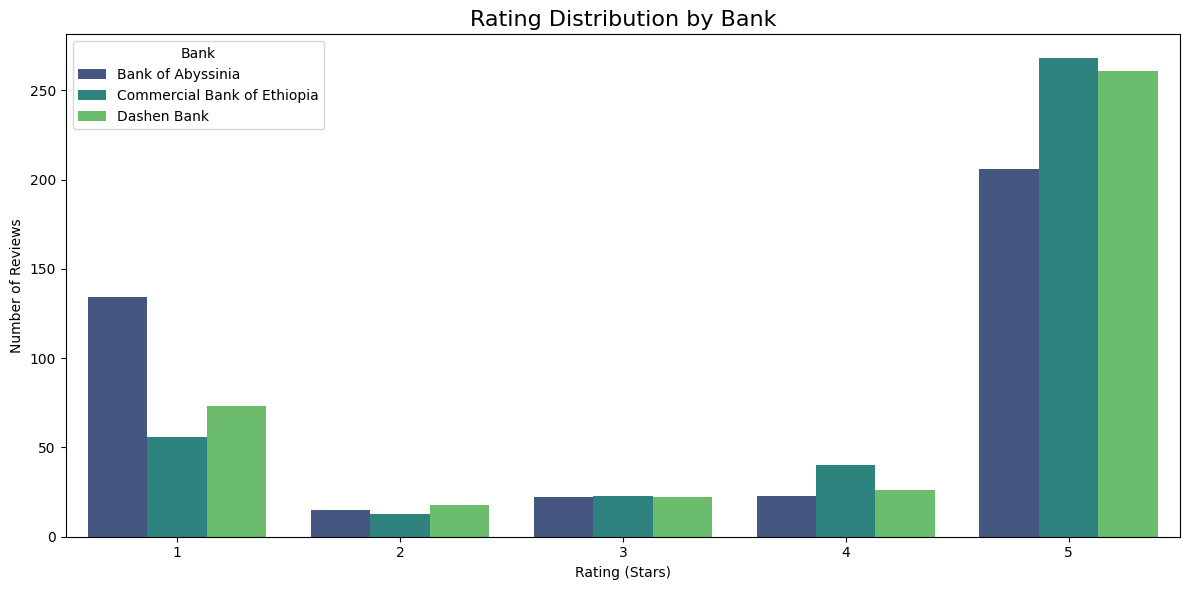

C:\Users\ruths\AppData\Local\Temp\ipykernel_50836\2610985597.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(['bank_name', pd.Grouper(key='review_date', freq='M')]).size().unstack(0).fillna(0)


<Figure size 1400x600 with 0 Axes>

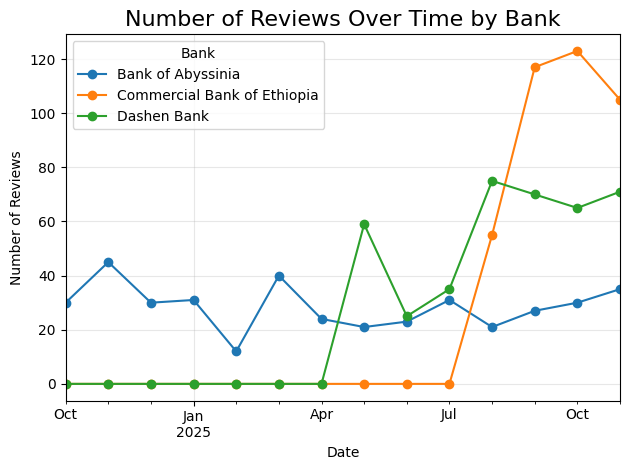

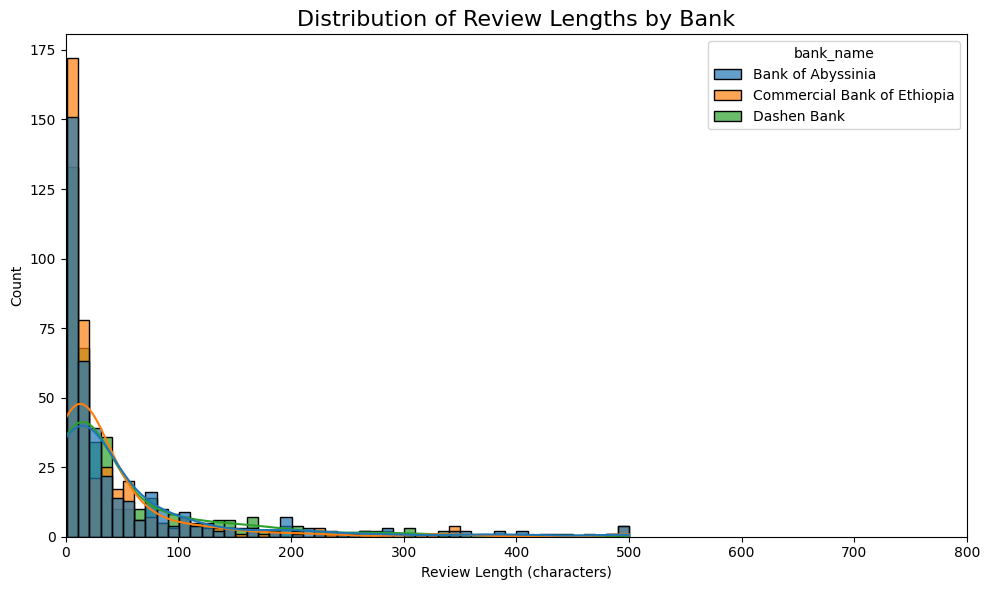

In [5]:
# Cell 4 - Quick EDA Visualizations
if df is not None:
    print("Generating visualizations...")

    # Rating Distribution by Bank
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='rating', hue='bank_name', palette='viridis')
    plt.title('Rating Distribution by Bank', fontsize=16)
    plt.xlabel('Rating (Stars)')
    plt.ylabel('Number of Reviews')
    plt.legend(title='Bank')
    plt.tight_layout()
    plt.show()

    # Reviews Over Time
    df['review_date'] = pd.to_datetime(df['review_date'])
    monthly = df.groupby(['bank_name', pd.Grouper(key='review_date', freq='M')]).size().unstack(0).fillna(0)

    plt.figure(figsize=(14, 6))
    monthly.plot(kind='line', marker='o')
    plt.title('Number of Reviews Over Time by Bank', fontsize=16)
    plt.ylabel('Number of Reviews')
    plt.xlabel('Date')
    plt.legend(title='Bank')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Review Length Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='text_length', hue='bank_name', bins=50, kde=True, alpha=0.7)
    plt.title('Distribution of Review Lengths by Bank', fontsize=16)
    plt.xlabel('Review Length (characters)')
    plt.xlim(0, 800)
    plt.tight_layout()
    plt.show()